# NumPy and Pandas

We'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, reading in the transactions data.

* Reading in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Converting `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [2]:
import pandas as pd
import numpy as np

In [3]:
transactions = pd.read_csv('..//project_data/project_transactions.csv',
                           usecols = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY','SALES_VALUE'])

In [4]:
transactions.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int64  
 3   PRODUCT_ID     int64  
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
dtypes: float64(1), int64(5)
memory usage: 98.3 MB


In [5]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [6]:
transactions = transactions.astype(
{'DAY' : 'int16',
'QUANTITY' : 'int32',
'PRODUCT_ID' : 'int32'})

In [7]:
transactions.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int16  
 3   PRODUCT_ID     int32  
 4   QUANTITY       int32  
 5   SALES_VALUE    float64
dtypes: float64(1), int16(1), int32(2), int64(2)
memory usage: 69.6 MB


In [8]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [9]:
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     int32         
 3   QUANTITY       int32         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 81.9 MB


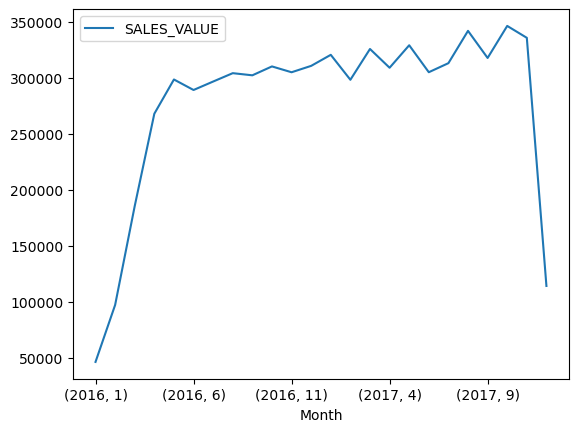

In [10]:
# Plot the sum of sales by month
sales_by_month = (transactions.groupby([transactions['date'].dt.year, transactions['date'].dt.month])
.agg({'SALES_VALUE' : 'sum'}))
sales_by_month.plot(xlabel = 'Month');

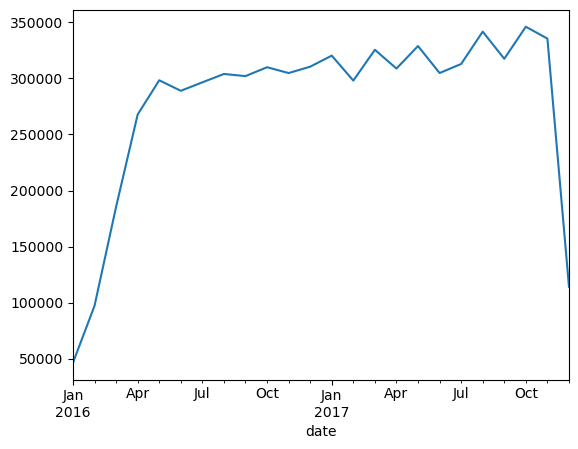

In [11]:
# Another way to do monthly sales : 
(transactions.set_index('date')
 .loc[:,'SALES_VALUE']
 .resample('M')
 .sum()
 .plot());


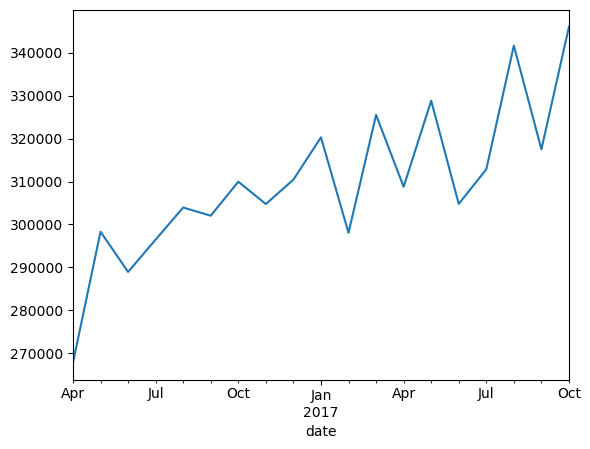

In [12]:
# plot the same series after filtering down to dates April 2016 and October 2017.

(transactions.set_index('date')
 .loc['04-2016':'10-2017','SALES_VALUE']
 .resample('M')
 .sum()
 .plot());


In [13]:
# plot the sum of monthly sales in 2016 vs the monthly sales 2017

yoy16vs17 = transactions.set_index('date').loc[:,['SALES_VALUE']].resample('M').sum()

<Axes: xlabel='date'>

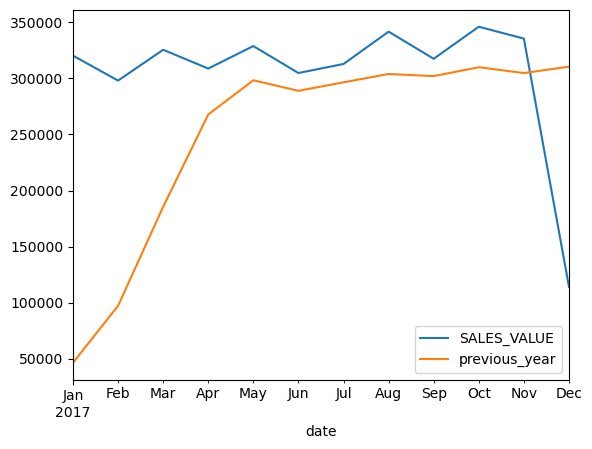

In [14]:
yoy16vs17.assign(previous_year = lambda x : x['SALES_VALUE'].shift(12)).loc['2017':,['SALES_VALUE','previous_year']].plot()

<Axes: xlabel='Day of the week'>

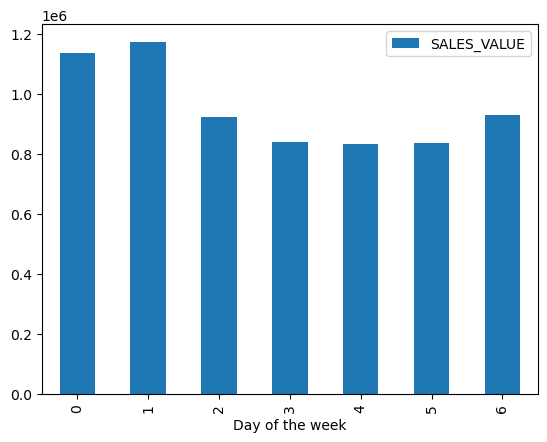

In [15]:
#  plot total sales by day of week

(transactions.groupby(transactions['date'].dt.dayofweek)
        .agg({'SALES_VALUE':'sum'})
        .plot.bar(xlabel = 'Day of the week'))

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [16]:
columns = ['AGE_DESC', 'INCOME_DESC', 'household_key','HH_COMP_DESC']
datatype = {'AGE_DESC':'category','INCOME_DESC':'category','household_key':'int16','HH_COMP_DESC':'category'}

demographic = pd.read_csv('..//project_data/hh_demographic.csv',
                          usecols = columns,
                         dtype = datatype )

In [17]:
demographic

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


In [18]:
demographic.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int16   
dtypes: category(3), int16(1)
memory usage: 6.2 KB


In [19]:
# group the transactions table by household_id, and calculate the sum of SALES VALUE by household.
agg_transactions = transactions.groupby('household_key').agg({'SALES_VALUE':'sum'})
agg_transactions

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [20]:
# join the demographics DataFrame to the aggregated transactions table
transactions_and_demographic = agg_transactions.merge(demographic,
                      how = 'inner',
                      left_on = 'household_key',
                      right_on = 'household_key')

transactions_and_demographic

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


In [21]:
transactions_and_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 13.3 KB


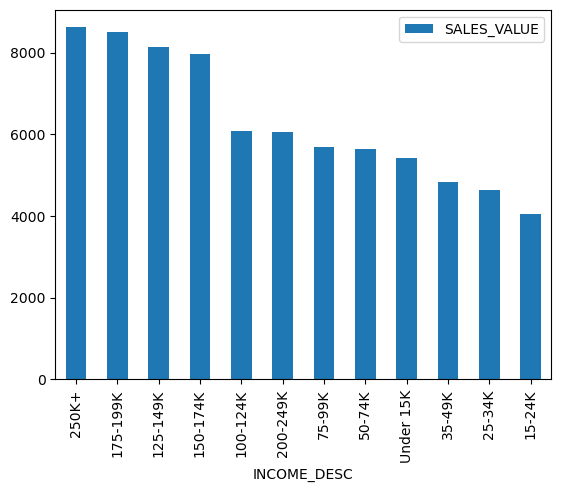

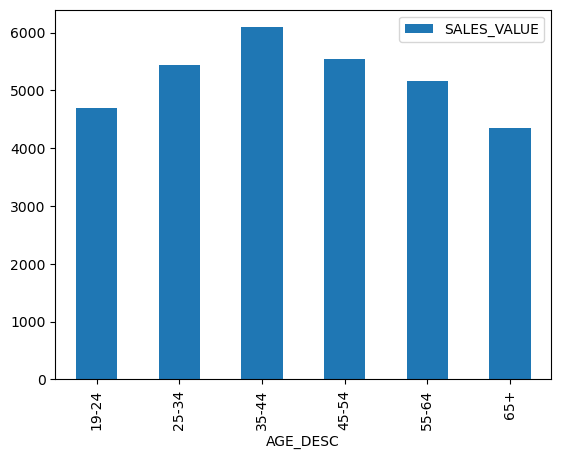

In [22]:
# Plot the sum of sales by age_desc and income_desc (in separate charts)

transactions_and_demographic.pivot_table(index = 'INCOME_DESC',
                                   values = 'SALES_VALUE').sort_values('SALES_VALUE', ascending = False).plot.bar();

transactions_and_demographic.pivot_table(index = 'AGE_DESC',
                                   values = 'SALES_VALUE').plot.bar();

In [23]:
# Create a pivot table of the mean household sales by AGE_DESC and HH_COMP_DESC. 
# Which of our demographics have the highest average sales?

(transactions_and_demographic.pivot_table(index = 'AGE_DESC',
                                  columns = 'HH_COMP_DESC',
                                  values = 'SALES_VALUE',
                                  aggfunc = 'mean').style.background_gradient(cmap = 'RdYlGn', axis = None))

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [24]:
product = pd.read_csv('..//project_data/product.csv' ,
                      usecols = ['PRODUCT_ID','DEPARTMENT'],
                     dtype = {'PRODUCT_ID' : 'int32',
                             'DEPARTMENT' : 'category'})

In [25]:
product

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY
...,...,...
92348,18293142,DRUG GM
92349,18293439,DRUG GM
92350,18293696,DRUG GM
92351,18294080,DRUG GM


In [26]:
# Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

full_join = (transactions.merge(demographic,
             how = 'inner',
             left_on = 'household_key',
             right_on = 'household_key')).merge(product,
                                            how = 'inner',
                                            left_on = 'PRODUCT_ID',
                                            right_on = 'PRODUCT_ID')
full_join

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,304,27950201718,842930,1,1.67,2016-03-21,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,842930,1,1.67,2017-04-29,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,842930,3,5.00,2016-03-27,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,842930,1,1.67,2017-11-29,55-64,35-49K,Single Male,GROCERY
...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,913709,1,10.99,2017-10-06,25-34,50-74K,Single Female,DRUG GM
1161571,540,41587471481,1024615,1,11.99,2017-10-19,25-34,50-74K,Single Female,DRUG GM
1161572,540,41587471481,9831733,1,0.00,2017-10-19,25-34,50-74K,Single Female,DRUG GM
1161573,540,41834711355,830676,1,8.99,2017-11-07,25-34,50-74K,Single Female,NUTRITION


In [27]:
# pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales.
fill_join_pivot = (full_join.pivot_table(index = 'DEPARTMENT',
                     columns = 'AGE_DESC',
                     values = 'SALES_VALUE',
                     aggfunc = 'sum').style.background_gradient(cmap = 'RdYlGn', axis = 1))

fill_join_pivot

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [75]:
fill_join_pivot.to_excel('fill_join_pivot.xlsx', sheet_name = 'pivot')